# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [3]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage import morphology
from skimage.morphology import disk

from skimage.color import rgb2gray
from skimage import data

Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

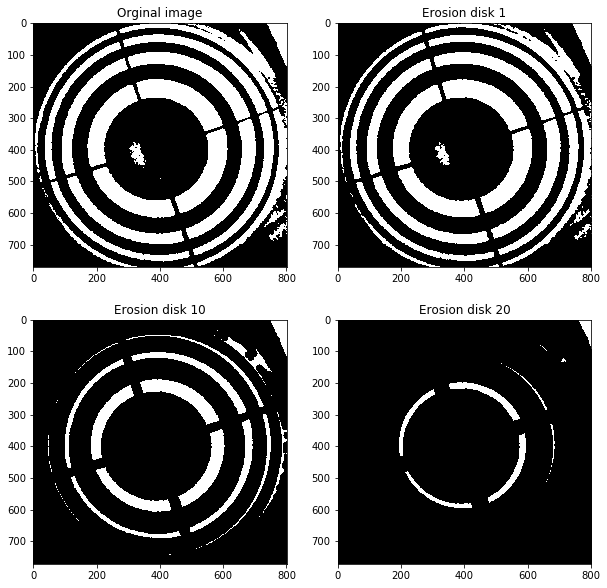

In [4]:
#Loading the image
img_path = './images/'
img_name = 'FindingContours.png'
FinCon_im = io.imread(img_path.__add__(img_name))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow (FinCon_im, cmap = cm.Greys_r)
ax0.set_title('Orginal image')

#Applying erosion
erosion_1 = morphology.erosion(FinCon_im, disk (1))
ax1.imshow (erosion_1,cmap = cm.Greys_r)
ax1.set_title ('Erosion disk 1')

erosion_10 = morphology.erosion(FinCon_im, disk (10))
ax2.imshow (erosion_10,cmap = cm.Greys_r)
ax2.set_title ('Erosion disk 10')

erosion_20 = morphology.erosion(FinCon_im, disk (20))
ax3.imshow (erosion_20, cmap = cm.Greys_r)
ax3.set_title ('Erosion disk 20')

** Q.1.2 Dilation **

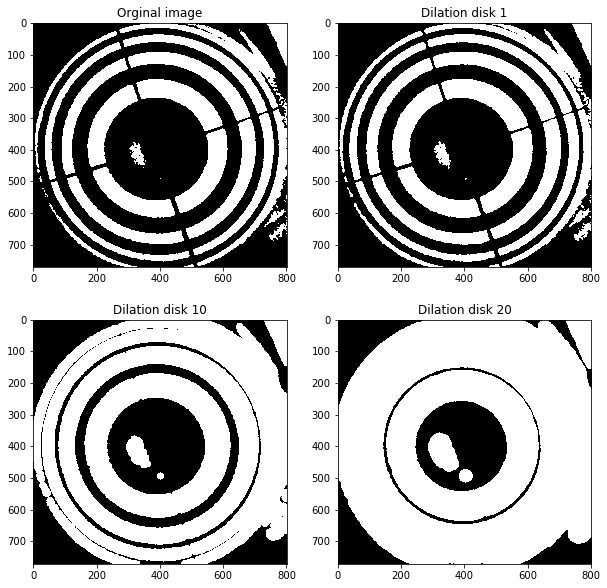

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow (FinCon_im, cmap = cm.Greys_r)
ax0.set_title('Orginal image')

#Applying Dilation
dilation_1 = morphology.dilation(FinCon_im, disk (1))
ax1.imshow (dilation_1, cmap = cm.Greys_r)
ax1.set_title ('Dilation disk 1')

dilation_10 = morphology.dilation(FinCon_im, disk (10))
ax2.imshow (dilation_10, cmap = cm.Greys_r)
ax2.set_title ('Dilation disk 10')

dilation_20 = morphology.dilation(FinCon_im, disk (20))
ax3.imshow (dilation_20, cmap = cm.Greys_r)
ax3.set_title ('Dilation disk 20')

** Q.1.3 Opening **

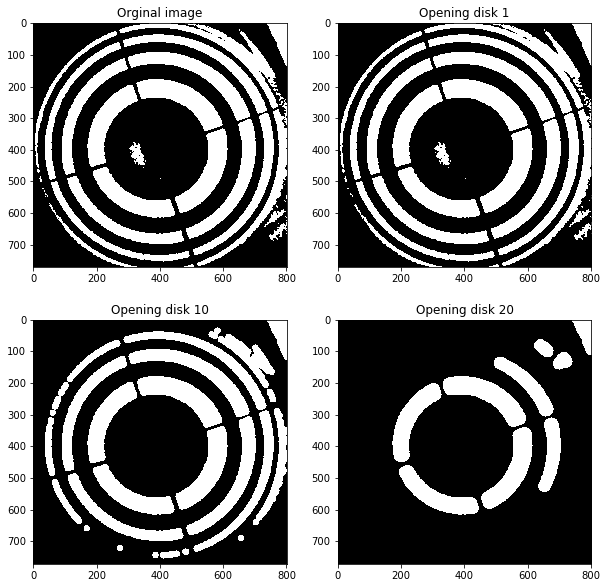

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow (FinCon_im, cmap = cm.Greys_r)
ax0.set_title('Orginal image')

#Applying Opening
opening_1 = morphology.opening(FinCon_im, disk (1))
ax1.imshow (opening_1, cmap = cm.Greys_r)
ax1.set_title ('Opening disk 1')

opening_10 = morphology.opening(FinCon_im, disk (10))
ax2.imshow (opening_10, cmap = cm.Greys_r)
ax2.set_title ('Opening disk 10')

opening_20 = morphology.opening(FinCon_im, disk (20))
ax3.imshow (opening_20, cmap = cm.Greys_r)
ax3.set_title ('Opening disk 20')

** Q.1.4 Closing**

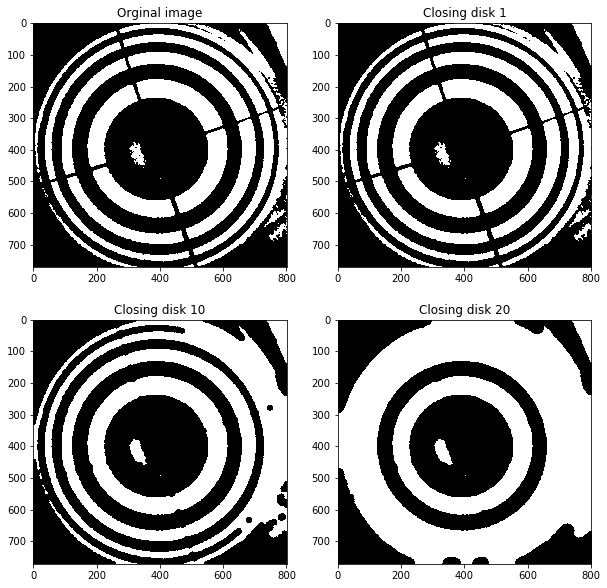

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow (FinCon_im, cmap = cm.Greys_r)
ax0.set_title('Orginal image')

#Applying Closing
closing_1 = morphology.closing(FinCon_im, disk (1))
ax1.imshow (closing_1,cmap = cm.Greys_r)
ax1.set_title ('Closing disk 1')

closing_10 = morphology.closing(FinCon_im, disk (10))
ax2.imshow (closing_10,cmap = cm.Greys_r)
ax2.set_title ('Closing disk 10')

closing_20 = morphology.closing(FinCon_im, disk (20))
ax3.imshow (closing_20,cmap = cm.Greys_r)
ax3.set_title ('Closing disk 20')

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

Erosion shrinks the image and the holes and gaps between different regions become larger eliminationg small details. In the other hand dilation has the opposite effect.The holes enclosed by a single region and gaps between different regions become smaller, and small gaps or holes are filled in. 
Opening and closing are combinations of erosion and dilation. Openig starts with erotion followed by dilation, and it's called opening because the effect is the opening of gaps in the image and the objects throught erosion and the objects that remain after it come back to their normal size by dilation. Closing is the opposite combination, it starts with dilation filling the holes in the region while keep the initian region sizes using erosion.

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

C:\Users\liliv\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


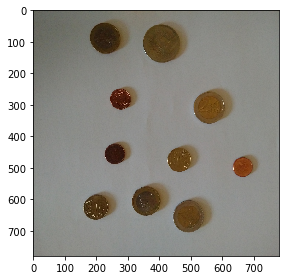

In [8]:
#Loading the image
img_path = './images/'
coins = 'coins.jpg'
coins_im = io.imread(img_path.__add__(coins))
#io.imshow(coins_im)
coins_ubyte = img_as_ubyte (coins_im, force_copy=False)
#io.imshow(coins_ubyte)

coins_rescale = rescale(coins_ubyte,0.25)
plt.show()
io.imshow (coins_rescale)
img = rescale (img_as_ubyte(io.imread(img_path.__add__('coins.jpg'))),.25)


**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

0.395128288335


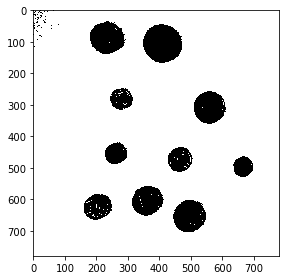

In [9]:
from skimage.filters import threshold_otsu
coins_grey = rgb2gray(coins_rescale)
thresh = threshold_otsu(coins_grey)
print(thresh)
binary = coins_grey > thresh
io.imshow(binary, cmap=plt.cm.gray)

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

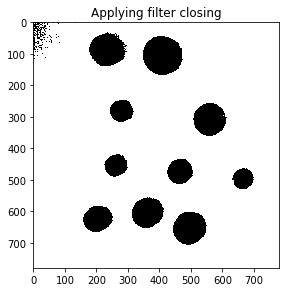

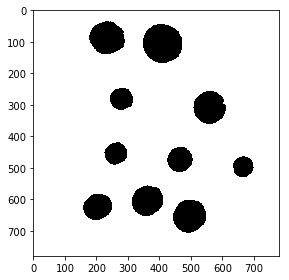

In [10]:
from skimage.segmentation import clear_border

coins_clean = morphology.erosion(binary > thresh, disk(1))
io.imshow(coins_clean)
plt.title('Applying filter closing')
coins_filt=morphology.closing(coins_clean, disk(5))
plt.show()
io.imshow (coins_filt)


**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


The number of regios is:10
The radius of the region 1 is: 53
The radius of the region 2 is: 62
The radius of the region 3 is: 35
The radius of the region 4 is: 51
The radius of the region 5 is: 35
The radius of the region 6 is: 39
The radius of the region 7 is: 32
The radius of the region 8 is: 49
The radius of the region 9 is: 43
The radius of the region 10 is: 52


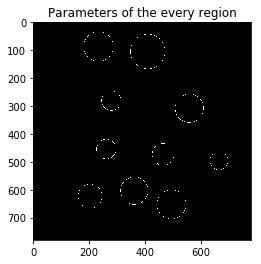

In [11]:
from skimage.measure import label,regionprops
import skimage.measure as measure
import skimage.draw

coins_label = label (coins_filt, background=True)
regions = regionprops (coins_label)

#Number of regions
print('The number of regios is:{}'.format(len (regions)))

#Takisng the parameter of the regios in a variable
region_prop = measure.regionprops(coins_label)
mask = np.zeros(coins_label.shape)

for i in range (len(region_prop)):
    print('The radius of the region {} is:'.format(i+1),int(region_prop[i].equivalent_diameter/2))
    coords= skimage.draw.circle_perimeter(int(region_prop[i].centroid[0]),int(region_prop[i].centroid[1]),int(region_prop[i].equivalent_diameter/2))
    mask[coords[0],coords[1]]=1
                                                                                                         
plt.show()
plt.imshow(mask,cmap=cm.gray)
plt.title('Parameters of the every region')
                                                                                                         

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

C:\Users\liliv\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


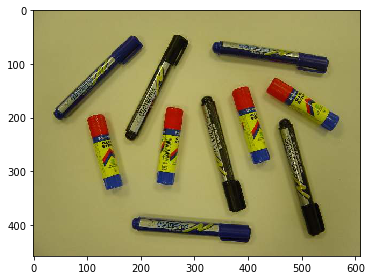

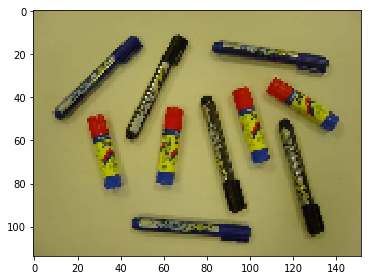

In [18]:
#Loading the image
img_path ='./images/'
objects = 'objets4.jpg'
objects_im = io.imread(img_path.__add__(objects))
#io.imshow(objects_im)
objects_ubyte = img_as_ubyte (objects_im, force_copy=False)
io.imshow(objects_ubyte)

#objects_rescale = rescale(objects_ubyte,0.25)
#plt.show()
#io.imshow (objects_rescale)


0.382993717831


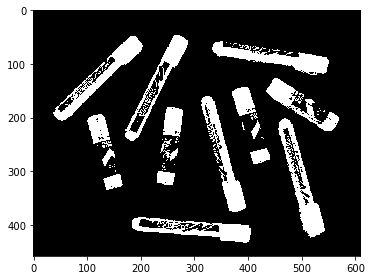

In [52]:
from skimage.morphology import binary_dilation

objects_grey = rgb2gray(objects_ubyte)
thresh = threshold_otsu(objects_grey)
print(thresh)

binary = objects_grey < thresh
io.imshow(binary, cmap=plt.cm.gray)

#image_d = morphology.binary_dilation(binary, selem = rectangle(10,5))
#plt.figure()
#io.imshow(image_d)

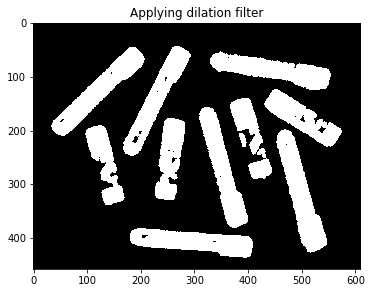

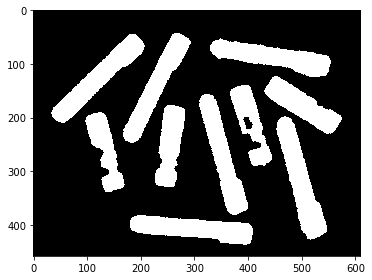

In [69]:
objects_clean = morphology.dilation(binary, disk(4))
io.imshow(objects_clean)
plt.title('Applying dilation filter')
objects_filt=morphology.closing(objects_clean, disk(5))
plt.show()
io.imshow (objects_filt)

The number of regios is:10
7511
7937
8051
6281
5100
7776
5650
4985
8674
7884
Number of pens is: 6
Number of glues is: 4


C:\Users\liliv\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


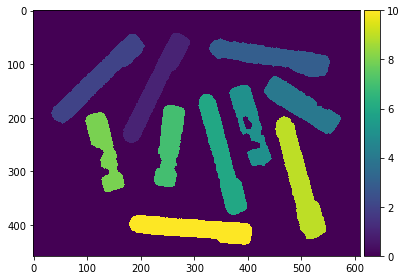

In [99]:
objects_label = label (objects_filt, background= False)
regions = regionprops (objects_label)

#Number of regions
print('The number of regios is:{}'.format(len (regions)))

#Takisng the parameter of the regios in a variable
region_prop = measure.regionprops(objects_label)
io.imshow(objects_label)

areas = 0
pens = 0
glues = 0

#Diffenciation of glues and pens through area
for i in range (0, len(region_prop)):
    print(region_prop[i].area)
    areas = region_prop[i].area
    if areas > 7000:
        pens = pens+1
    elif areas < 7000:
        glues = glues+1 

print('Number of pens is:',pens)
print('Number of glues is:',glues)
    